In [1]:
import matplotlib.pyplot as plt
import torch

import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist

from plt_utils import plot_pred
from laplace import Laplace

pyro.set_rng_seed(0)

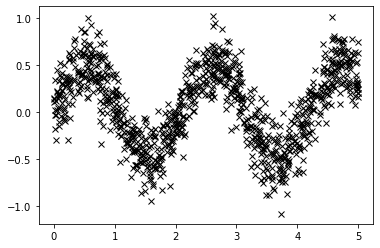

In [2]:
N = 1000
X = dist.Uniform(0.0, 5.0).sample(sample_shape=(N,))
y = 0.5 * torch.sin(3*X) + dist.Normal(0.0, 0.2).sample(sample_shape=(N,))

plt.plot(X.numpy(), y.numpy(), "kx")

In [11]:
# initialize the inducing inputs
Xu = torch.arange(20.) / 4.0
print(Xu)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 1.5000, 1.7500, 2.0000,
        2.2500, 2.5000, 2.7500, 3.0000, 3.2500, 3.5000, 3.7500, 4.0000, 4.2500,
        4.5000, 4.7500])


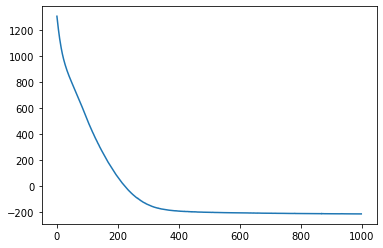

In [12]:
# Clear optim params
pyro.clear_param_store()

# Specifiy the model
kernel = gp.kernels.RBF(input_dim=1)
likelihood = gp.likelihoods.Gaussian()
vsgp = gp.models.VariationalSparseGP(X, y, kernel, Xu=Xu, likelihood=likelihood, whiten=True)

# Optimise
num_steps = 1000
losses = gp.util.train(vsgp, num_steps=num_steps)
plt.plot(losses)

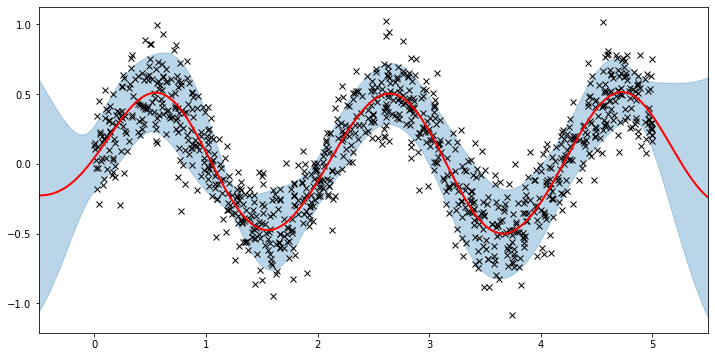

In [13]:
plot_pbbred(X, y, vsgp)

In [30]:
Xu = torch.arange(14.) / 3.0
print(Xu)

tensor([0.0000, 0.3333, 0.6667, 1.0000, 1.3333, 1.6667, 2.0000, 2.3333, 2.6667,
        3.0000, 3.3333, 3.6667, 4.0000, 4.3333])


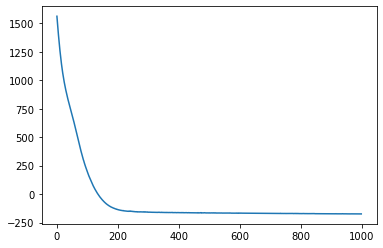

In [31]:
# Clear optim params
pyro.clear_param_store()

# Specifiy the model
kernel = gp.kernels.RBF(input_dim=1)
likelihood = Laplace()
vsgp_laplace_lik = gp.models.VariationalSparseGP(X, y, kernel, Xu=Xu, likelihood=likelihood, whiten=True)

# Optimise
num_steps = 1000
losses = gp.util.train(vsgp_laplace_lik, num_steps=num_steps)
plt.plot(losses)


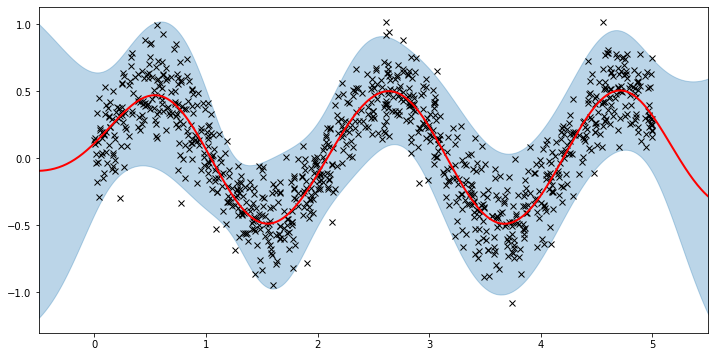

In [34]:
plot_pred(X, y, vsgp_laplace_lik)